# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


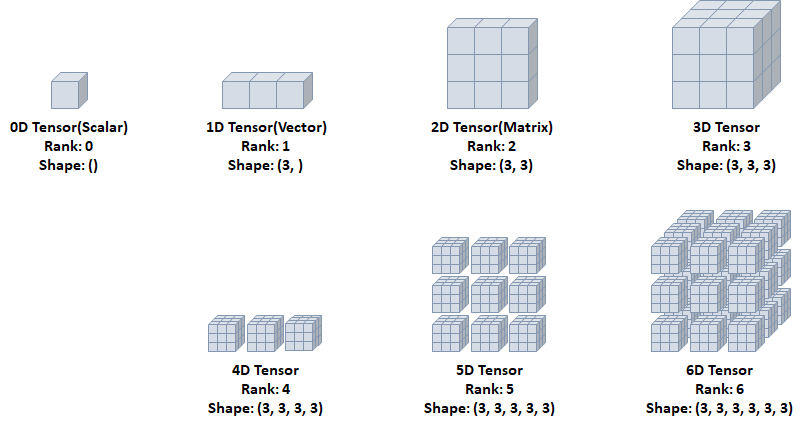

In [1]:
import torch
torch.__version__

'1.11.0+cu113'

In [ ]:
# 텐서 초기화와 데이터 타입
x=torch.empty(4,2)
x

tensor([[-2.4337e-02,  3.0824e-41],
        [ 4.4842e-44,  0.0000e+00],
        [        nan,  0.0000e+00],
        [ 1.0948e+21,  9.2868e-04]])

In [ ]:
# 무작위로 초기화된 텐서
x = torch.rand(4,2)
x

tensor([[0.0197, 0.5810],
        [0.1232, 0.6823],
        [0.2721, 0.1058],
        [0.0477, 0.7345]])

In [ ]:
#데이터 타입이 long이고 0으로 채워진 텐서
x=torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3,2,3])
x

tensor([3, 2, 3])

In [ ]:
# 2 x 4 크기, double 타입, 1로 채워진 텐서
x= x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
x=torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[ 0.1200, -0.4314,  0.9192,  0.7872],
        [ 0.3859,  0.3862, -0.3327, -0.8322]])


In [ ]:
#텐서의 크기 계산
x.size()

torch.Size([2, 4])

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [ ]:
ft = torch.FloatTensor([1,2,3])
ft

tensor([1., 2., 3.])

In [ ]:
ft=torch.ByteTensor([-1,-2,-3])
ft

tensor([255, 254, 253], dtype=torch.uint8)

In [ ]:
# CUDA Tensors : .to 메소드를 사용하여 텐서를 어떠한 장치(CPU,GPU)로도 옮길 수 있다.
x=torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.9028])
0.9028332829475403
torch.float32


In [ ]:
from torch.cuda import is_available
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cuda


In [ ]:
y=torch.ones_like(x,device=device)
print(y)
x = x.to(device)
print(x)
z=x+y
print(z)
print(z.to('cpu',torch.double))

tensor([1.], device='cuda:0')
tensor([0.9028], device='cuda:0')
tensor([1.9028], device='cuda:0')
tensor([1.9028], dtype=torch.float64)


In [ ]:
# 다차원 텐서 표현

#0D Tensor(Scalar)
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


In [ ]:
# 1D tensor
t1 = torch.tensor([1,2,3]) 
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


In [ ]:
# 2D tensor
t2 = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
3,4,5, 텐서 생성

In [ ]:
# 3D tensor
t3 = torch.tensor([[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]]
                  )
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [ ]:
t3 = torch.randint(0,20,(5,5,5))
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([5, 5, 5])
tensor([[[19,  2,  0,  8, 16],
         [ 6, 11, 11, 12, 17],
         [10, 13,  9,  4, 16],
         [ 2, 11,  9,  7,  0],
         [ 3,  6, 11,  5, 12]],

        [[16, 10,  9,  0,  8],
         [ 9, 10, 13,  1, 15],
         [10,  8,  2, 14, 13],
         [17,  4,  5, 19, 12],
         [15, 12,  3, 15, 16]],

        [[ 6, 16,  8,  8,  9],
         [ 0, 13,  3,  5, 18],
         [14, 12,  8,  1, 11],
         [19,  3, 13, 13, 16],
         [ 7, 11, 10, 18, 10]],

        [[ 9,  5, 13, 17, 19],
         [18,  1, 11, 14, 17],
         [ 9,  9,  6,  9, 16],
         [ 0, 18, 10,  2,  2],
         [10, 19, 18, 19,  8]],

        [[ 6, 10,  4, 19, 13],
         [10,  9, 18,  1,  3],
         [17,  8,  7, 15, 17],
         [ 8,  1,  5,  9,  5],
         [ 5,  3, 18,  3,  4]]])


In [ ]:
# 4D tensor
t4 = torch.tensor([[[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]],
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]],
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]]])
print(t4.ndim)
print(t4.shape)
print(t4)

4
torch.Size([3, 3, 3, 3])
tensor([[[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]],


        [[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]],


        [[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]])


In [ ]:
t4 = torch.randint(0,20,(5,5,5,5))
print(t4.ndim)
print(t4.shape)
print(t4)

4
torch.Size([5, 5, 5, 5])
tensor([[[[ 0,  2, 11,  6,  6],
          [ 2,  8, 11,  5,  6],
          [17,  2,  0,  9, 10],
          [ 9, 10, 19, 11,  3],
          [15, 15,  7, 17,  1]],

         [[18, 12, 17, 14, 10],
          [10,  7, 18,  4, 11],
          [13, 18,  2,  9, 10],
          [ 4, 19, 15, 10, 18],
          [17,  5, 10,  4,  7]],

         [[15,  3,  7,  2,  7],
          [12, 13,  4, 19, 19],
          [ 0,  7, 17, 14, 19],
          [ 9, 11,  0, 16, 19],
          [17, 13, 13, 12,  8]],

         [[ 7,  1, 19, 11, 12],
          [11, 17,  8,  1,  3],
          [ 7,  2, 17,  6,  6],
          [10,  8, 17,  6, 17],
          [ 0,  3, 13, 18, 18]],

         [[18, 19,  3,  2,  8],
          [12,  3, 14,  9, 15],
          [ 7,  9, 16,  0, 17],
          [13,  6, 16, 19,  7],
          [12, 17, 17, 16, 12]]],


        [[[ 1,  1,  9,  0,  7],
          [15, 16, 13, 14,  2],
          [17,  3,  2, 18, 18],
          [ 5,  6, 17,  9, 11],
          [16,  6, 19, 19,  9]],


In [ ]:
# 5d tensor
t5 = torch.tensor([[[[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]],
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]],
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]]],
                  [[[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]],
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]],
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]]],
                  [[[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]],
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]],
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]]]])
print(t5.ndim)
print(t5.shape)
print(t5)

5
torch.Size([3, 3, 3, 3, 3])
tensor([[[[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]],


         [[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]],


         [[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]]],



        [[[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]],


         [[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

        

In [ ]:
t5 = torch.randint(0,20,(5,5,5,5,5))
print(t5.ndim)
print(t5.shape)
print(t5)

5
torch.Size([5, 5, 5, 5, 5])
tensor([[[[[ 0, 12, 10,  1, 15],
           [ 4, 11, 18, 12, 17],
           [14, 19,  3,  3,  7],
           [ 2,  8,  8,  4,  0],
           [12, 19,  1, 11, 14]],

          [[15,  9,  7, 13, 16],
           [12, 11,  6,  3,  6],
           [ 2, 12, 17, 18,  5],
           [16,  8,  4, 19,  7],
           [16, 15, 18,  2,  1]],

          [[12,  6,  7, 17,  6],
           [18,  3, 13, 17,  8],
           [17, 12, 19, 12, 15],
           [19,  4,  8, 16,  6],
           [13, 11,  0, 19, 11]],

          [[ 5,  8, 13, 16,  1],
           [19,  4,  0,  6,  9],
           [ 7, 18,  6,  5, 17],
           [ 1, 12,  7, 11, 17],
           [10,  7, 15,  2,  1]],

          [[12,  2,  9, 14,  6],
           [17, 17,  8, 13,  0],
           [ 8, 18, 12,  2,  4],
           [ 3,  4, 11, 18,  4],
           [18, 14,  4,  2,  8]]],


         [[[17, 15, 15, 18, 17],
           [18,  0, 12,  6,  0],
           [12, 16,  2, 10,  9],
           [14, 19, 14, 19, 13],
 

In [ ]:
# 텐서의 연산
import math
a = torch.randn(1,2) * 2 -1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a,-0.5,0.5))
print(torch.max(a))
print(torch.mean(a))
print(torch.min(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2])))

tensor([[-2.3915,  1.0269]])
tensor([[2.3915, 1.0269]])
tensor([[-2.,  2.]])
tensor([[-3.,  1.]])
tensor([[-0.5000,  0.5000]])
tensor(1.0269)
tensor(-0.6823)
tensor(-2.3915)
tensor(2.4171)
tensor(-2.4557)
tensor([1, 2, 3])


덧셈 뺄셈, 곱셈(mul), 나눗셈,내적 (matmul.mm)

In [ ]:
x = torch.tensor([[10,2,5],
                  [2,7,4],
                  [2,17,4]])
y = torch.tensor([[-3,5,-4],
                 [-3,20,-4],
                [-3,10,-4]])
print(x)
print(y)
print(torch.add(x,y))
print(torch.sub(x,y))
print(torch.mul(x,y))
print(torch.div(x,y))
print(torch.matmul(x,y))

tensor([[10,  2,  5],
        [ 2,  7,  4],
        [ 2, 17,  4]])
tensor([[-3,  5, -4],
        [-3, 20, -4],
        [-3, 10, -4]])
tensor([[ 7,  7,  1],
        [-1, 27,  0],
        [-1, 27,  0]])
tensor([[ 13,  -3,   9],
        [  5, -13,   8],
        [  5,   7,   8]])
tensor([[-30,  10, -20],
        [ -6, 140, -16],
        [ -6, 170, -16]])
tensor([[-3.3333,  0.4000, -1.2500],
        [-0.6667,  0.3500, -1.0000],
        [-0.6667,  1.7000, -1.0000]])
tensor([[-51, 140, -68],
        [-39, 190, -52],
        [-69, 390, -92]])


In [ ]:
10*-3+2*-3+5*-3

-51

In [ ]:
# Manipulations
# 인덱싱 : numpy처럼 인덱싱 형태로 사용 가능

x = torch.Tensor([[1,2],[3,4]])
print(x)
print(x[0,0])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)


In [ ]:
print(x[:,0])
print(x[0,:])

tensor([1., 3.])
tensor([1., 2.])


In [ ]:
# view : 텐서의 크기(size)나 모양(shape)을 변경
x = torch.randn(4,5)
print(x.shape)
print(x.size())
print(x)

torch.Size([4, 5])
torch.Size([4, 5])
tensor([[ 0.0484, -0.1253,  0.6757,  0.6996,  2.3565],
        [ 0.6892, -0.6567,  0.1297, -0.1593, -1.0188],
        [-1.3895, -0.3472, -2.4887, -1.4937,  0.7236],
        [-1.2396, -0.1742,  0.4185, -0.1368, -0.2600]])


In [ ]:
y=x.view(20)
print(y)

tensor([ 0.0484, -0.1253,  0.6757,  0.6996,  2.3565,  0.6892, -0.6567,  0.1297,
        -0.1593, -1.0188, -1.3895, -0.3472, -2.4887, -1.4937,  0.7236, -1.2396,
        -0.1742,  0.4185, -0.1368, -0.2600])


In [ ]:
z=x.view(5,-1)
print(z)

tensor([[ 0.0484, -0.1253,  0.6757,  0.6996],
        [ 2.3565,  0.6892, -0.6567,  0.1297],
        [-0.1593, -1.0188, -1.3895, -0.3472],
        [-2.4887, -1.4937,  0.7236, -1.2396],
        [-0.1742,  0.4185, -0.1368, -0.2600]])


In [ ]:
x=torch.FloatTensor([[1,2],[3,4],[5,6],[7,8]])
print(x)
# size를 활용한 텐서 사이즈 보기
print(x.size())
# shape를 활용한 텐서 사이즈 보기
print(x.shape)
# dim을 활용한 텐서 사이즈 보기
print(x.dim())
# 0 차원 사이즈 확인

# 1 차원 사이즈 확인


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
torch.Size([4, 2])
2


In [ ]:
import torch
x= torch.FloatTensor([
                      [1,2],
                     [3,4],
                      [5,6],
                      [7,8]])
print(x)
#size 를 활용한 텐서 사이즈 보기
print(x.size())
#  shape 를 활용한 텐서 사이즈 보기
print(x.shape)
# dim을 활용한 텐서 차원확인
print(x.dim)
#0차원 사이즈 확인
print(x.size(0))
#1차원 사이즈 확인
print(x.shape[1])


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
torch.Size([4, 2])
<built-in method dim of Tensor object at 0x7fb288619cb0>
4
2


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.0770])
-0.07700305432081223
torch.float32


In [ ]:
# item은 스칼라값 하나만 존재해야 사용 가능
x=torch.randn(2)
print(x)
# print(x.item())
print(x.dtype)

tensor([2.4144, 0.5180])
torch.float32


In [ ]:
# squeze : 차원을 축소
tensor=torch.rand(1,3,3)
print(tensor)
tensor.shape

tensor([[[0.5117, 0.3618, 0.2717],
         [0.2340, 0.7534, 0.2545],
         [0.2883, 0.0418, 0.7128]]])


torch.Size([1, 3, 3])

In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.5117, 0.3618, 0.2717],
        [0.2340, 0.7534, 0.2545],
        [0.2883, 0.0418, 0.7128]])
torch.Size([3, 3])


In [ ]:
# unsqueeze : 차원을 증가
t=torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.0499, 0.1929, 0.5191],
        [0.3297, 0.8878, 0.9324],
        [0.2625, 0.3816, 0.4306]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
tensor.shape

torch.Size([1, 3, 3])

In [ ]:
#Stack : 텐서간 결합
x = torch.FloatTensor([1,4])
print(x)
y=torch.FloatTensor([2,5])
print(y)
z=torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat: 텐서를 결합하는 메소드(concatenate)

넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
해당 차원을 늘려준 후 결합

In [ ]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b), dim =0)
print(c)
print(c.size())

tensor([[[-0.9285,  1.3212,  0.5206],
         [-0.3248,  1.3094, -0.6371],
         [-0.1789,  0.3662, -0.4122]]])
tensor([[[-0.8559,  1.9654, -0.5132],
         [-0.1923,  0.4562,  0.2081],
         [ 1.4062, -1.0672,  0.2363]]])
tensor([[[-0.9285,  1.3212,  0.5206],
         [-0.3248,  1.3094, -0.6371],
         [-0.1789,  0.3662, -0.4122]],

        [[-0.8559,  1.9654, -0.5132],
         [-0.1923,  0.4562,  0.2081],
         [ 1.4062, -1.0672,  0.2363]]])
torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a,b), dim =1)
print(c)
print(c.size())

tensor([[[-0.9285,  1.3212,  0.5206],
         [-0.3248,  1.3094, -0.6371],
         [-0.1789,  0.3662, -0.4122],
         [-0.8559,  1.9654, -0.5132],
         [-0.1923,  0.4562,  0.2081],
         [ 1.4062, -1.0672,  0.2363]]])
torch.Size([1, 6, 3])


In [ ]:
c = torch.cat((a,b), dim =2)
print(c)
print(c.size())

tensor([[[-0.9285,  1.3212,  0.5206, -0.8559,  1.9654, -0.5132],
         [-0.3248,  1.3094, -0.6371, -0.1923,  0.4562,  0.2081],
         [-0.1789,  0.3662, -0.4122,  1.4062, -1.0672,  0.2363]]])
torch.Size([1, 3, 6])


chunk: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)
# torch.chunk(tensor, a, dim=b) tensor의 b차원텐서의 크기를 a로 정함 

In [ ]:
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.2044, 0.2710, 0.4297, 0.3807, 0.2858, 0.3672],
        [0.8536, 0.4352, 0.9044, 0.7146, 0.3901, 0.9763],
        [0.2267, 0.5757, 0.4219, 0.9916, 0.5681, 0.8897]])
tensor([[0.2044, 0.2710],
        [0.8536, 0.4352],
        [0.2267, 0.5757]])
tensor([[0.4297, 0.3807],
        [0.9044, 0.7146],
        [0.4219, 0.9916]])
tensor([[0.2858, 0.3672],
        [0.3901, 0.9763],
        [0.5681, 0.8897]])



split: chunk와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

# torch.split(tensor, a, dim=b) tensor의 b차원텐서의 크기를 a로 정함 


In [ ]:
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.split(tensor, 2, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.4349, 0.1339, 0.9069, 0.2321, 0.2927, 0.9790],
        [0.2235, 0.0761, 0.4009, 0.2649, 0.5752, 0.5993],
        [0.2363, 0.7633, 0.9553, 0.7056, 0.5120, 0.9303]])
tensor([[0.4349, 0.1339],
        [0.2235, 0.0761],
        [0.2363, 0.7633]])
tensor([[0.9069, 0.2321],
        [0.4009, 0.2649],
        [0.9553, 0.7056]])
tensor([[0.2927, 0.9790],
        [0.5752, 0.5993],
        [0.5120, 0.9303]])


torch ↔️ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함


In [ ]:
from torch.cuda import is_available
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')

In [ ]:
a=torch.ones(7)
print(a.to('cpu',torch.double))
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
a.add_(1)

tensor([2., 2., 2., 2., 2., 2., 2.])

In [ ]:
b = a.numpy()
print(b)
print(a)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.])


In [ ]:
import numpy as np
a=np.ones(7)
b=torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)  #cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html


requires_grad 속성을 True로 설정하면 해당 텐서에서 이루어지는 모든 연산들을 추척하기 시작. 기록을 추적하는 것을 주안하게 하여면. detach를 호출하면 연산기록으로 부터 분리


requires_grad_(...)는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경

In [ ]:
# in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _가 붙음
x=torch.rand(2,2)
print(x)
y=torch.rand(2,2)
print(y)
y.add_(x)
print(y)

tensor([[0.0938, 0.7206],
        [0.5275, 0.0823]])
tensor([[0.9949, 0.5090],
        [0.5870, 0.5386]])
tensor([[1.0887, 1.2296],
        [1.1145, 0.6209]])


In [ ]:
a = torch.randn(3,3)
a= a*3
print(a)
print(a.requires_grad)

tensor([[ 0.9181, -0.0605, -3.8006],
        [ 7.6058, -4.5987, -2.1385],
        [-0.3069, -3.5107, -3.5145]])
False


In [ ]:
a.requires_grad_(True) # _를 사용하면 inplace 연산
print(a.requires_grad)
b=(a*a).sum()
print(b)
print(b.grad_fn)

True
tensor(123.6307, grad_fn=<SumBackward0>)


In [ ]:
# 기울기(Gradient)
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y=x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y*y
out = z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
print(out)
out.backward() # backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
# grad : data가 거쳐온 layer에 대한 미분값 저장
print(x)
print(x.grad) # x의 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용


In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [ ]:
# detach()
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a=torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a=torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [ ]:
b=a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
c=b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음


토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [21]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요


In [22]:
mnist_trainsform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(mean=(0.5),std=(1.0,))])

In [23]:
trainset = datasets.MNIST(root='/content',
                          train=True,download=True
                          ,transform=mnist_trainsform)

testset = datasets.MNIST(root='/content',
                          train=False,download=True
                          ,transform=mnist_trainsform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [24]:
!ls ./MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [25]:
#DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴
train_loader = DataLoader(trainset,batch_size=8,shuffle=True,num_workers=2)
test_loader = DataLoader(testset,batch_size=8,shuffle=True,num_workers=2)

In [26]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape,labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [27]:
torch_image=torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

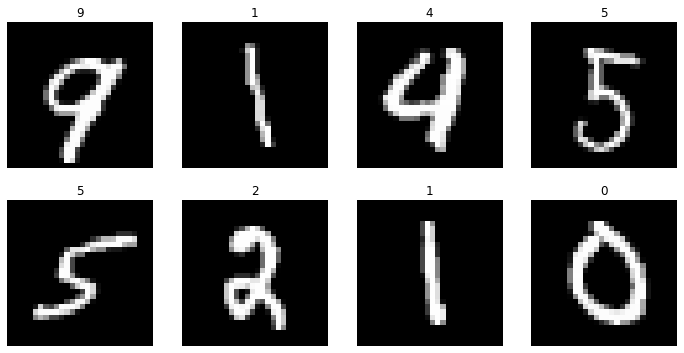

In [28]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(12,6))
cols,rows = 4,2
for i in range(1,cols*rows+1):
  sample_idx=torch.randint(len(trainset),size=(1,)).item()
  img,label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [2]:
import torch.nn as nn

In [5]:
input = torch.randn(128,20)
print(input)

m=nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[-0.3966,  1.2169,  1.0395,  ..., -0.9727, -1.8079,  0.1834],
        [-0.9644, -0.2870, -0.3033,  ..., -0.1665,  0.3089,  0.0706],
        [ 0.4002, -0.5936, -0.3281,  ...,  0.1484, -1.3757, -1.0598],
        ...,
        [-0.8872, -0.5535,  0.2617,  ..., -2.2187,  0.0917, -1.5383],
        [ 0.0292,  0.1707,  0.8332,  ..., -0.4275,  0.4396, -0.3939],
        [-0.1833,  0.0596, -0.9298,  ..., -0.6464,  1.4055,  0.9305]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-2.6968e-01, -1.1824e+00, -5.5946e-01,  ..., -1.6678e-01,
         -3.9179e-01,  5.8957e-01],
        [-8.7624e-01, -8.5906e-02,  4.0014e-01,  ..., -8.9264e-01,
         -1.5142e+00,  2.0767e-01],
        [ 4.4320e-01,  4.8899e-01,  8.9654e-01,  ..., -9.9244e-01,
         -7.0991e-02,  3.9079e-01],
        ...,
        [ 7.5920e-01,  5.4677e-01, -8.6726e-01,  ..., -7.9988e-01,
         -7.5057e-01,  5.2661e-01],
        [ 2.9115e-01,  3.5634e-01,  9.2124e-01,  ..., -4.1979e-01,
          7.6872e-01, -

In [7]:
input=torch.randn(20,16,50,100)

In [ ]:
https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

In [8]:
# dilation은 한픽셀
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2),dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [9]:
output=m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈


In [10]:
nn.Conv2d(
    in_channels = 1,
    out_channels = 20,
    kernel_size = 5,
    stride = 1
)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [11]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [12]:
#weight 확인
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [15]:
# weight는 detach()를 통해 꺼내주어야 numpy() 변환 가능
weight=weight.detach()
weight=weight.numpy()
weight.shape

(20, 1, 5, 5)

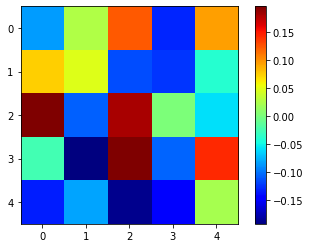

In [20]:
import matplotlib.pyplot as plt
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])


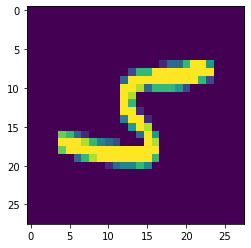

In [32]:
# mnist image
print(images.shape)

print(images[0].size())
input_image=torch.squeeze(images[0])
plt.imshow(input_image)

In [33]:
input_data = torch.unsqueeze(images[0],dim=0)
print(input_data.size())

torch.Size([1, 1, 28, 28])


In [36]:
output_data = layer(input_data)
output = output_data.data
output_arr= output.numpy()
output_arr.shape

(1, 20, 24, 24)

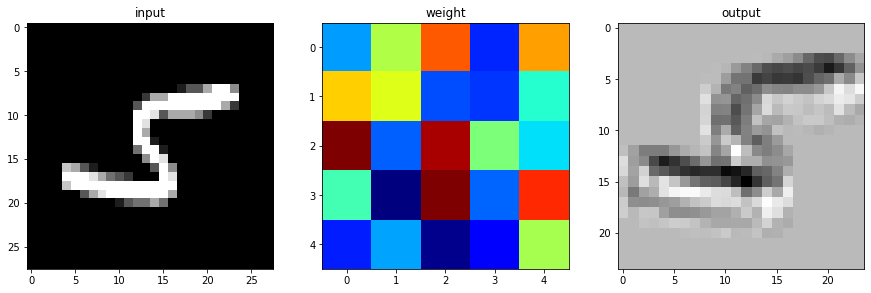

In [38]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0,0,:,:],'gray')

### 풀링 레이어(Pooling layers)

- `F.max_pool2d` 
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용


In [39]:
import torch.nn.functional as F
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [40]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

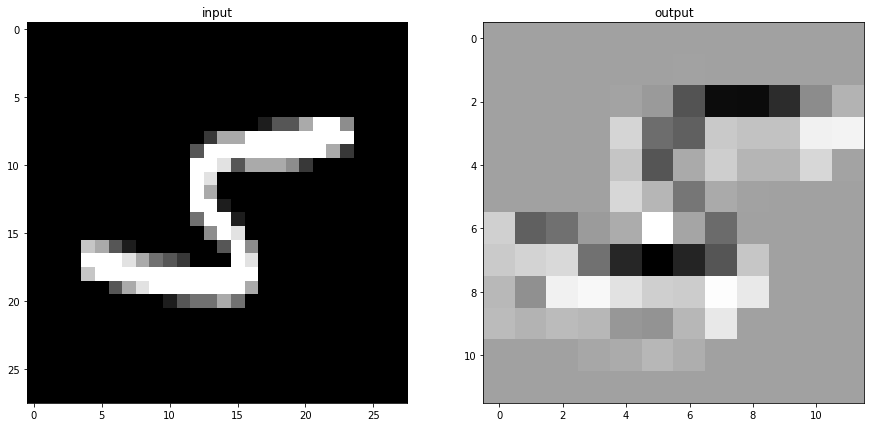

In [43]:
plt.figure(figsize=(15,30))
plt.subplot(121)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0,0,:,:],'gray')


In [45]:
# 선형 레이어(Linear layer) : 1d만 가능하므로 .view()를 통해 1d로 펼쳐주어야 함
flatten=input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [46]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [47]:
lin

tensor([[-0.0501, -0.2756,  0.0944, -0.2985, -0.0131, -0.1232,  0.2392, -0.1420,
          0.0912, -0.2159]], grad_fn=<AddmmBackward0>)

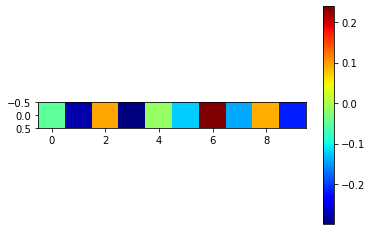

In [50]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()

In [51]:
# 비선형 활성화(Non-linear Activation)
with torch.no_grad():
  flatten = input_image.view(1,28*28)
  lin=nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin,dim=1)
softmax

tensor([[0.1073, 0.0990, 0.0863, 0.1037, 0.0933, 0.0862, 0.1558, 0.1165, 0.0788,
         0.0731]])

In [53]:
import numpy as np
np.sum(softmax.numpy())

0.99999994

선형 회귀 모델


In [74]:
# 데이터 생성
X = torch.randn(200,1)*10
y = X+3*torch.randn(200,1)

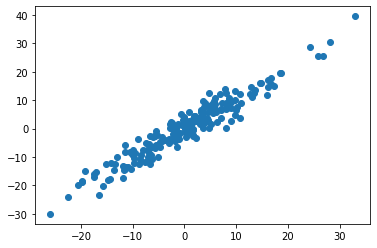

In [59]:
plt.scatter(X.numpy(),y.numpy())

In [60]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel,self).__init__()
    self.linear = nn.Linear(1,1)
  
  def forward(self,x):
    pred=self.linear(x)
    return pred

In [61]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.1989]], requires_grad=True), Parameter containing:
tensor([0.3315], requires_grad=True)]


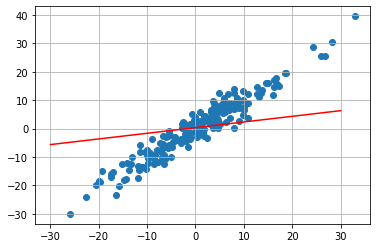

In [67]:
w,b=model.parameters()
w1,b1=w[0][0].item(),b[0].item()
x1=np.array([-30,30])
y1=w1*x1+b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()

In [76]:
# 손실 함수 및 최적화 함수
import torch.optim as optim
criterion = nn.MSELoss
optimizer = optim.SGD(model.parameters(),lr=0.001)


In [79]:
epochs = 100
losses = []

for i in range(epochs):
    optimizer.zero_grad()
    y_pred = model.foward(X)
    
    #손실 계산
    loss = criterion(y_pred, y)#예측값과 실제 값 차이
    
    losses.append(loss)
    print(f"epoch {i} loss : {loss.item()} weight : {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    
    #매 반복회수마다 최적화 한 값 초기화
    
    
    #역전파 수행
    loss.backward()
    #기울기 하강 한단계 수행
    optimizer.step()

AttributeError: ignored

In [77]:
# 모델 학습
epochs=100
losses = []
for epoch in range(epochs):
  optimizer.zero_grad()
  y_pred=model(X)
  loss = criterion(y_pred,y)
  losses.append(loss.item())
  loss.backward() # 역전파 수행, 자동 미분 결과 업데이트
  optimizer.step() # 옵티마이저 스탭을 다음으로 진행

RuntimeError: ignored

In [ ]:
plt.plot(range(epochs),losses)

**FashionMNIST** 분류모델

In [95]:
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5))])

In [96]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='/content/',
                                 train=False, download=True,
                                 transform=transform)

In [97]:
train_loader = DataLoader(trainset,batch_size=128, num_workers=2)
test_loader = DataLoader(testset,batch_size=128, num_workers=2)

In [98]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고 next는 이터레이터에서 값을 차례대로 꺼냄
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

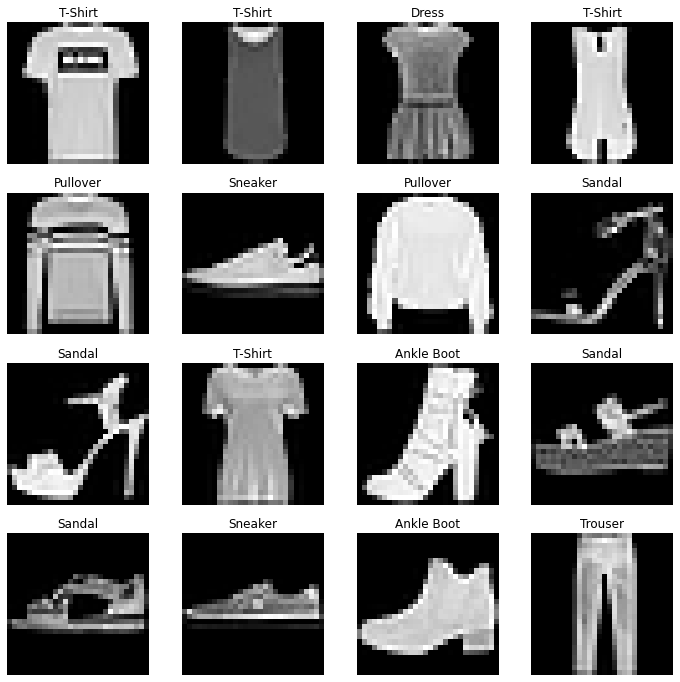

In [99]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',
}
figure = plt.figure(figsize=(12,12))
cols,rows = 4,4
for i in range(1,cols*rows+1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()

In [103]:
#모델 정의 및 파라미터
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()
    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x=F.max_pool2d(F.relu(self.conv2(x)),2)
    x=x.view(-1,self.num_flat_features(x))
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)      
    return x
  def num_flat_features(self,x):
    size=x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [108]:
params = list(net.parameters())
print(params[0].size())

torch.Size([6, 1, 3, 3])


In [111]:
input = torch.randn(1,1,28,28)
out=net(input)
print(out)

tensor([[ 0.0780, -0.0492,  0.0577, -0.0973,  0.1104,  0.0343,  0.0085,  0.0325,
         -0.0327, -0.0521]], grad_fn=<AddmmBackward0>)


In [112]:
#손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001,momentum=0.9)

In [114]:
# 모델 학습
total_batch = len(train_loader)
print(total_batch)

469


##zero_grad()

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.




In [118]:
for epoch in range(10):
  running_loss = 0.0

  for i ,data in enumerate(train_loader,0):
    inputs,labels=data
    optimizer.zero_grad()
    outputs=net(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print('Epoch:{}, Iter:{}, Loss:{}'.format(epoch+1,i+1,running_loss/20000))
      running_loss = 0.0

Epoch:1, Iter:100, Loss:0.003029550513625145
Epoch:1, Iter:200, Loss:0.003068804582953453
Epoch:1, Iter:300, Loss:0.003018816244602203
Epoch:1, Iter:400, Loss:0.002903834441304207
Epoch:2, Iter:100, Loss:0.002855170127749443
Epoch:2, Iter:200, Loss:0.0029023044019937517
Epoch:2, Iter:300, Loss:0.002847948980331421
Epoch:2, Iter:400, Loss:0.0027482060000300406
Epoch:3, Iter:100, Loss:0.002709159405529499
Epoch:3, Iter:200, Loss:0.0027546348676085472
Epoch:3, Iter:300, Loss:0.002702668821811676
Epoch:3, Iter:400, Loss:0.002619809025526047
Epoch:4, Iter:100, Loss:0.0025860771149396897
Epoch:4, Iter:200, Loss:0.002629164183139801
Epoch:4, Iter:300, Loss:0.0025724050030112265
Epoch:4, Iter:400, Loss:0.002506967370212078
Epoch:5, Iter:100, Loss:0.0024750515088438987
Epoch:5, Iter:200, Loss:0.0025145313397049902
Epoch:5, Iter:300, Loss:0.0024572329327464102
Epoch:5, Iter:400, Loss:0.002403207677602768
Epoch:6, Iter:100, Loss:0.0023723132148385047
Epoch:6, Iter:200, Loss:0.002412240755558014
E

##모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [119]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(),PATH)

In [120]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [121]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [122]:
# 모델 테스트

def imshow(image):
  image = image/2+0.5
  npimg = image.numpy()

  fit = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0))) # rgb -> gbr
  plt.show()

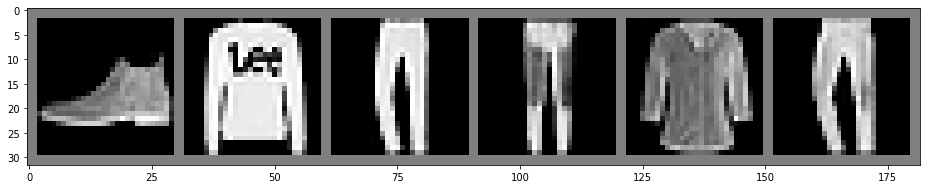

In [124]:
import torchvision

dataiter = iter(test_loader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:6]))

In [125]:
outpits = net(images)
_,predicted = torch.max(outputs,1)
print(predicted)

tensor([0, 0, 0, 9, 2, 9, 3, 0, 2, 8, 1, 1, 4, 2, 1, 8, 9, 4, 0, 8, 0, 1, 3, 5,
        3, 8, 4, 1, 9, 0, 0, 3, 1, 2, 1, 9, 7, 5, 4, 0, 2, 2, 1, 4, 8, 8, 6, 7,
        2, 2, 3, 7, 1, 2, 2, 4, 3, 6, 8, 4, 2, 6, 3, 8, 2, 6, 9, 4, 5, 4, 0, 4,
        4, 2, 9, 9, 3, 2, 4, 5, 4, 0, 4, 0, 6, 1, 4, 1, 7, 4, 8, 5, 1, 3, 0, 5])


In [128]:
print(''.join('{},'.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

T-Shirt,T-Shirt,T-Shirt,Ankle Boot,Pullover,Ankle Boot,


In [129]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(100 * correct / total)

83.84
